In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OrdinalEncoder, normalize
from sklearn.model_selection import GroupKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import torch
from torch.utils.data import DataLoader
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
#from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,fbeta_score, matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BIO-ICT/ML in Bioinformatics: 4/LUNG-cancer_(Anita_Nipa)/dataset/final_dataset')

df.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481,disease
0,GSM2390709,5.3778,0.0,29.9966,79.4447,11.5377,331.1383,2.9982,276.3616,0.0000,...,0.0,8.1998,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0
1,GSM2390710,28.1463,0.0,8.9981,164.2823,62.2469,126.0767,13.3882,116.5498,28.0368,...,0.0,4.1287,0.0,0.9857,0.0,0.0,0.0,0.0000,0.0,0
2,GSM2390711,43.0877,0.0,106.1169,246.6412,65.2244,216.0954,66.2496,127.2017,167.8786,...,0.0,2.6270,0.0,0.0000,0.0,0.0,0.0,7.0002,0.0,0
3,GSM2390712,17.2068,0.0,26.9998,148.6016,22.1030,90.0563,12.0112,62.7658,3.0821,...,0.0,0.9274,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0
4,GSM2390713,29.0300,0.0,74.9880,178.9198,46.1695,92.0471,12.0072,233.1397,12.3236,...,0.0,3.7531,0.0,0.0000,0.0,0.0,0.0,6.0005,0.0,0


#X Y specification

In [ ]:
X = df.drop(['disease', 'Sample_Names'], axis=1)

In [ ]:
Y = df['disease']

In [ ]:
X.head()


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,MIR3913-2,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,5.3778,0.0,29.9966,79.4447,11.5377,331.1383,2.9982,276.3616,0.0000,56.0340,...,0.0,0.0,8.1998,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
1,28.1463,0.0,8.9981,164.2823,62.2469,126.0767,13.3882,116.5498,28.0368,1.0008,...,0.0,0.0,4.1287,0.0,0.9857,0.0,0.0,0.0,0.0000,0.0
2,43.0877,0.0,106.1169,246.6412,65.2244,216.0954,66.2496,127.2017,167.8786,40.0239,...,0.0,0.0,2.6270,0.0,0.0000,0.0,0.0,0.0,7.0002,0.0
3,17.2068,0.0,26.9998,148.6016,22.1030,90.0563,12.0112,62.7658,3.0821,2.0013,...,0.0,0.0,0.9274,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
4,29.0300,0.0,74.9880,178.9198,46.1695,92.0471,12.0072,233.1397,12.3236,12.0085,...,0.0,0.0,3.7531,0.0,0.0000,0.0,0.0,0.0,6.0005,0.0


# convert float to int values

In [ ]:
float_values = X.values

In [ ]:
X.values[0][0]

5.3778

In [ ]:
float_values

array([[  5.3778,   0.    ,  29.9966, ...,   0.    ,   0.    ,   0.    ],
       [ 28.1463,   0.    ,   8.9981, ...,   0.    ,   0.    ,   0.    ],
       [ 43.0877,   0.    , 106.1169, ...,   0.    ,   7.0002,   0.    ],
       ...,
       [ 34.7858,   0.    ,  14.0003, ...,   0.    ,   0.    ,   0.    ],
       [ 41.0873,   0.    ,  21.0007, ...,   0.    ,   0.5   ,   1.0005],
       [ 34.8669,   0.    ,  20.0003, ...,   0.    ,   4.9329,   1.0005]])

In [ ]:
length_outer = len(float_values)
length_outer

633

In [ ]:
float_values[0]

array([ 5.3778,  0.    , 29.9966, ...,  0.    ,  0.    ,  0.    ])

In [ ]:
length_inner = len(float_values[0])
length_inner

28089

In [ ]:
type(float_values[0][0])

numpy.float64

In [ ]:
X.values[0][0]

5.3778

In [ ]:
for i in range(length_outer):
  for j in range(length_inner):
    dummy = X.values[i][j] - int(X.values[i][j])
    if dummy >= 0.5:
      X.values[i][j] = math.ceil(X.values[i][j])
      X.values[i][j] = X.values[i][j].astype(int)

      #df['Weight'] = df['Weight'].astype(int)

    else:
      X.values[i][j] = math.floor(X.values[i][j])
      X.values[i][j] = X.values[i][j].astype(int)




In [ ]:
X.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,MIR3913-2,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,5.0,0.0,30.0,79.0,12.0,331.0,3.0,276.0,0.0,56.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,0.0,9.0,164.0,62.0,126.0,13.0,117.0,28.0,1.0,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,43.0,0.0,106.0,247.0,65.0,216.0,66.0,127.0,168.0,40.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
3,17.0,0.0,27.0,149.0,22.0,90.0,12.0,63.0,3.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,0.0,75.0,179.0,46.0,92.0,12.0,233.0,12.0,12.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


In [ ]:
for column in X.columns:
   X[column]= X[column].apply(np.int64)



In [ ]:
X.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,MIR3913-2,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,5,0,30,79,12,331,3,276,0,56,...,0,0,8,0,0,0,0,0,0,0
1,28,0,9,164,62,126,13,117,28,1,...,0,0,4,0,1,0,0,0,0,0
2,43,0,106,247,65,216,66,127,168,40,...,0,0,3,0,0,0,0,0,7,0
3,17,0,27,149,22,90,12,63,3,2,...,0,0,1,0,0,0,0,0,0,0
4,29,0,75,179,46,92,12,233,12,12,...,0,0,4,0,0,0,0,0,6,0


In [ ]:
Y.value_counts()

1    402
0    231
Name: disease, dtype: int64

In [ ]:
#Checking the unique value counts in columns
featureValues={}
for d in X.columns.tolist():
    count=X[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n ['NOL12', 'LCE1D', 'MIRLET7E', 'MIR429', 'MIR371A', 'MIR379', 'MIR337', 'SNORD18C', 'SNORD115-29', 'SNORD36A', 'SNORD115-21', 'SNORD115-19', 'SNORD115-18', 'SNORD114-26', 'SNORD115-41', 'SNORD115-11', 'SNORD18A', 'SNORD115-8', 'SNORD115-16', 'SNORD115-6', 'SNORD36B', 'SNORD115-32', 'SNORD115-30', 'SNORD115-17', 'SNORD45B', 'SNORD52', 'SNORD115-38', 'SNORD115-31', 'SNORD14C', 'SNORD115-44', 'SNORD115-43', 'SNORD115-36', 'SNORD18B', 'SNORD58A', 'SNORD24', 'SNORD61', 'SNORD102', 'MIR433', 'MIR662', 'MIR127', 'MIR657', 'MIR487A', 'MIR9-1', 'MIR136', 'MIR431', 'MIR125A', 'MIR3065', 'SNORD110', 'MIR1228', 'SNORA11D', 'MIR1180', 'SNORA11E', 'MIR1260A', 'MIR1538', 'C2-AS1', 'C4B.1', 'C2-AS1.2', 'C2-AS1.3', 'SNORD56', 'C2-AS1.5', 'CXorf51B', 'CDSN.5', 'RNU7-1', 'SNORD109B', 'MIR3179-2', 'SNORD52.1', 'MIR3187', 'SNORD84', 'MIR3185', 'MIR3197', 'MIR3621', 'MIR1587', 'MIR4492', 'MIR4456', 'MIR4656', 'MIR3124', 'SNORD95', 'SNORD84.1', 'MIR4638', 'MIR3131', 'MIR3

In [ ]:
cols_to_drop

['NOL12',
 'LCE1D',
 'MIRLET7E',
 'MIR429',
 'MIR371A',
 'MIR379',
 'MIR337',
 'SNORD18C',
 'SNORD115-29',
 'SNORD36A',
 'SNORD115-21',
 'SNORD115-19',
 'SNORD115-18',
 'SNORD114-26',
 'SNORD115-41',
 'SNORD115-11',
 'SNORD18A',
 'SNORD115-8',
 'SNORD115-16',
 'SNORD115-6',
 'SNORD36B',
 'SNORD115-32',
 'SNORD115-30',
 'SNORD115-17',
 'SNORD45B',
 'SNORD52',
 'SNORD115-38',
 'SNORD115-31',
 'SNORD14C',
 'SNORD115-44',
 'SNORD115-43',
 'SNORD115-36',
 'SNORD18B',
 'SNORD58A',
 'SNORD24',
 'SNORD61',
 'SNORD102',
 'MIR433',
 'MIR662',
 'MIR127',
 'MIR657',
 'MIR487A',
 'MIR9-1',
 'MIR136',
 'MIR431',
 'MIR125A',
 'MIR3065',
 'SNORD110',
 'MIR1228',
 'SNORA11D',
 'MIR1180',
 'SNORA11E',
 'MIR1260A',
 'MIR1538',
 'C2-AS1',
 'C4B.1',
 'C2-AS1.2',
 'C2-AS1.3',
 'SNORD56',
 'C2-AS1.5',
 'CXorf51B',
 'CDSN.5',
 'RNU7-1',
 'SNORD109B',
 'MIR3179-2',
 'SNORD52.1',
 'MIR3187',
 'SNORD84',
 'MIR3185',
 'MIR3197',
 'MIR3621',
 'MIR1587',
 'MIR4492',
 'MIR4456',
 'MIR4656',
 'MIR3124',
 'SNORD95',
 

In [ ]:

X=X.drop(cols_to_drop, axis = 1)
print(X)


     TSPAN6  TNMD  DPM1  SCYL3  C1orf112  FGR  CFH  FUCA2  GCLC  NFYA  ...  \
0         5     0    30     79        12  331    3    276     0    56  ...   
1        28     0     9    164        62  126   13    117    28     1  ...   
2        43     0   106    247        65  216   66    127   168    40  ...   
3        17     0    27    149        22   90   12     63     3     2  ...   
4        29     0    75    179        46   92   12    233    12    12  ...   
..      ...   ...   ...    ...       ...  ...  ...    ...   ...   ...  ...   
628      45     0     4     75        46   38   76     45    15     7  ...   
629      33     0    31    151        56  275   86    113    60    18  ...   
630      35     0    14     44         4   51    2    198     2     5  ...   
631      41     0    21    147        50   19  118     51    29     6  ...   
632      35     0    20     70        21   80   98     64    47    11  ...   

     MIR5087  MIR3913-2  MIR6830  TCF20.7  MIR548AH  MIR522  MI

In [ ]:
len(cols_to_drop)

194

In [ ]:
X.shape

(633, 27895)

#over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
# Randomly over sample the minority class
random = RandomOverSampler(random_state=42)
x_new, y_new= random.fit_resample(X, Y)
# Check the number of records after over sampling
#print(sorted(Counter(ytrain_smote).items()))

In [ ]:
x_new.shape

(804, 27895)

In [ ]:
y_new.shape

(804,)

In [ ]:
x_new

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,MIR5087,MIR3913-2,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3202-2,HSFX3,MIR4481
0,5,0,30,79,12,331,3,276,0,56,...,0,0,0,8,0,0,0,0,0,0
1,28,0,9,164,62,126,13,117,28,1,...,0,0,0,4,0,1,0,0,0,0
2,43,0,106,247,65,216,66,127,168,40,...,0,0,0,3,0,0,0,0,7,0
3,17,0,27,149,22,90,12,63,3,2,...,0,0,0,1,0,0,0,0,0,0
4,29,0,75,179,46,92,12,233,12,12,...,0,0,0,4,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,12,0,29,127,35,160,2,219,12,37,...,0,0,0,4,0,0,0,0,0,0
800,34,4,15,73,46,60,40,64,24,17,...,0,0,0,2,1,0,1,0,0,1
801,17,0,38,136,36,203,26,45,60,17,...,0,0,0,2,0,0,0,0,5,0
802,3,0,29,102,53,39,10,86,7,19,...,0,0,0,3,0,0,0,0,0,0


##train_test split, scaling

In [ ]:
from sklearn.model_selection import train_test_split
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(x_new, y_new,random_state=42,train_size=0.8)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (643, 27895)
train size y :  (643,)
test size X :  (161, 27895)
test size y :  (161,)


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = x_new.columns
X_test.columns = x_new.columns


In [ ]:
X_train

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,MIR5087,MIR3913-2,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3202-2,HSFX3,MIR4481
0,0.418823,2.738787,0.309140,0.849187,0.585509,1.651223,1.134092,0.206851,0.865201,0.364926,...,-0.197757,-0.088527,-0.088527,0.263114,-0.321948,-0.244295,-0.284700,-0.068465,-0.319533,2.799789
1,2.410484,-0.508866,0.069722,0.448221,1.028691,0.121764,1.512974,-0.052472,0.688464,2.112974,...,-0.197757,-0.088527,-0.088527,-0.024123,-0.321948,3.097870,1.819463,-0.068465,0.351028,-0.350280
2,-0.715668,0.709004,0.608412,1.049670,2.674793,0.218042,-0.634023,1.066710,-0.261498,-0.267346,...,-0.197757,-0.088527,-0.088527,0.837588,-0.321948,-0.244295,-0.284700,-0.068465,0.887476,-0.350280
3,-0.589614,-0.508866,-0.618605,0.197618,0.268951,-0.387139,-0.844513,0.971170,-0.769617,0.885621,...,-0.197757,-0.088527,-0.088527,6.582326,-0.321948,-0.244295,-0.284700,-0.068465,-0.587757,-0.350280
4,-0.135817,-0.508866,0.937612,-0.303589,0.300607,0.768208,-0.149896,0.193202,-0.504512,0.699659,...,-0.197757,-0.088527,-0.088527,-1.173070,-0.321948,-0.244295,-0.284700,-0.068465,-0.319533,-0.350280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,-0.917356,-0.508866,-0.828096,-0.378770,-1.123904,-0.675976,-0.865562,-1.567461,-0.968447,-0.899619,...,-0.197757,-0.088527,-0.088527,-1.460307,-0.321948,-0.244295,-0.284700,-0.068465,-0.587757,-0.350280
639,1.149939,1.520917,-0.229551,0.611114,0.553854,-0.359631,1.449827,-0.516522,0.600095,-0.155769,...,-0.197757,-0.088527,-0.088527,0.263114,3.278273,-0.244295,-0.284700,-0.068465,-0.051309,1.224755
640,-0.362716,-0.508866,-0.947805,-1.092989,-0.807346,-0.664972,-0.507729,0.356985,-0.769617,-0.490502,...,-0.197757,-0.088527,-0.088527,0.550351,-0.321948,-0.244295,-0.284700,-0.068465,-0.587757,-0.350280
641,-0.715668,-0.508866,-0.139769,-0.466481,-1.218872,-0.554939,-0.739268,-0.775845,-0.902170,-0.899619,...,-0.197757,-0.088527,-0.088527,-0.024123,-0.321948,-0.244295,-0.284700,-0.068465,-0.587757,-0.350280


In [ ]:
X_test

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,MIR5087,MIR3913-2,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3202-2,HSFX3,MIR4481
0,-0.892145,-0.508866,-0.349260,-0.792265,0.142328,-0.260601,-0.886611,-0.639359,-0.968447,-0.527694,...,-0.197757,-0.088527,-0.088527,-0.311359,-0.321948,-0.244295,-0.284700,-0.068465,-0.587757,-0.350280
1,0.065870,-0.508866,1.566084,1.250152,1.756774,1.755754,-0.234092,1.762786,0.334990,2.968402,...,-0.197757,-0.088527,-0.088527,1.412062,-0.321948,-0.244295,-0.284700,-0.068465,-0.185421,1.224755
2,-0.438348,-0.508866,-0.319333,-0.579252,-0.617411,0.121764,-0.107798,-0.161660,-0.305682,0.253349,...,-0.197757,-0.088527,-0.088527,0.263114,-0.321948,-0.244295,1.819463,-0.068465,-0.587757,1.224755
3,0.570088,-0.508866,-0.259478,-0.804795,0.712133,0.146521,0.228986,-0.639359,0.202437,-0.192961,...,-0.197757,-0.088527,-0.088527,-0.024123,-0.321948,-0.244295,1.819463,-0.068465,0.351028,-0.350280
4,2.687804,2.738787,0.309140,2.127264,1.883398,0.033737,2.249689,-0.298145,1.351228,0.922814,...,-0.197757,-0.088527,-0.088527,1.124825,-0.321948,-0.244295,1.819463,-0.068465,1.423925,-0.350280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,-0.186239,-0.508866,-0.618605,-0.466481,0.775444,-0.458661,-0.886611,0.575362,-0.902170,-0.899619,...,-0.197757,-0.088527,-0.088527,-1.173070,-0.321948,-0.244295,-0.284700,-0.068465,-0.587757,-0.350280
157,1.981899,-0.102910,0.189431,0.961958,0.775444,1.827275,0.649965,-0.025174,0.710556,1.443509,...,2.692196,-0.088527,-0.088527,1.986536,-0.321948,3.097870,-0.284700,-0.068465,0.082803,-0.350280
158,0.771775,1.520917,-0.109842,1.024609,0.395575,-0.186329,2.733816,-0.270848,0.445450,0.922814,...,-0.197757,-0.088527,-0.088527,-0.598596,1.478163,-0.244295,-0.284700,-0.068465,-0.587757,4.374824
159,-0.186239,-0.508866,-0.498896,-0.591783,-0.174230,-0.392641,-0.507729,0.179554,-0.416143,0.253349,...,2.692196,-0.088527,-0.088527,-0.311359,-0.321948,-0.244295,-0.284700,-0.068465,-0.587757,2.799789


In [ ]:
#check for distribution of labels
y_train.value_counts(normalize=True)

1    0.506998
0    0.493002
Name: disease, dtype: float64

#Confusion Matrix

In [ ]:
#For test and train data.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    A = (((C.T)/(C.sum(axis=1))).T)
    B = (C/C.sum(axis=0))

    plt.figure(figsize = (20,4))
    labels = [1,2]
    sns.set_style('darkgrid')

    plt.subplot(1,3,1)
    sns.heatmap(C, annot = True , fmt = ".3f", xticklabels = labels, yticklabels = labels)
    colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
    sns.set_palette(sns.color_palette(colors))
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Confusion matrix")

    plt.subplot(1,3,2)
    sns.heatmap(B, annot = True , fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot = True , fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Orziginal Class")
    plt.title("Recall matrix")

    plt.show()

def curve(a, rf_fpr, rf_tpr, rf_auc):
  # plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
  plt.plot(rf_fpr, rf_tpr, marker='.', label= a + ' (AUROC = %0.3f)' % rf_auc)
  # Title
  plt.title('ROC plot without oversampling')
  # Axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  # Show legend
  plt.legend() #
  # Show plot
  plt.show()



In [ ]:
from sklearn import metrics

#All Scores with True Positive, True Negative

In [ ]:
def score_generate_train(X_train, y_actual, preds, model):

    accuracy = metrics.accuracy_score(y_train, preds)
    print('accuracy ',accuracy)
    precision_positive = metrics.precision_score(y_train, preds, pos_label=1)
    precision_negative = metrics.precision_score(y_train, preds, pos_label=0)


    print('precision_positive ',precision_positive)
    print('precision_negative ',precision_negative)

    recall_sensitivity = metrics.recall_score(y_train, preds, pos_label=1)
    recall_specificity = metrics.recall_score(y_train, preds, pos_label=0)
    print('recall_sensitivity ',recall_sensitivity)
    print('recall_specificity ',recall_specificity)

    f1_positive = metrics.f1_score(y_train, preds, pos_label=1)
    f1_negative = metrics.f1_score(y_train, preds, pos_label=0)


    print('f1_positive score ',f1_positive)
    print('f1_negative score ',f1_negative)



    print(metrics.classification_report(y_train, preds))






    hamming_loss = metrics.hamming_loss(y_train, preds)
    print('hamming_loss ',hamming_loss )


    logloss = metrics.log_loss(y_train, model.predict_proba(X_train))
    print('log loss ',logloss)


    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    # Import necessary modules
    from sklearn.metrics import roc_curve

    y_score1 = model.predict_proba(X_train)[:,1]
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, y_score1)
    print('roc_auc_score for ', model,' : ', roc_auc_score(y_train, y_score1))
    sns.set_style('darkgrid')

    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_train)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()



In [ ]:
def score_generate(X_test, y_actual, preds, model):

    accuracy = metrics.accuracy_score(y_test, preds)
    print('accuracy ',accuracy)
    precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
    precision_negative = metrics.precision_score(y_test, preds, pos_label=0)


    print('precision_positive ',precision_positive)
    print('precision_negative ',precision_negative)

    recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
    recall_specificity = metrics.recall_score(y_test, preds, pos_label=0)
    print('recall_sensitivity ',recall_sensitivity)
    print('recall_specificity ',recall_specificity)

    f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
    f1_negative = metrics.f1_score(y_test, preds, pos_label=0)


    print('f1_positive score ',f1_positive)
    print('f1_negative score ',f1_negative)



    print(metrics.classification_report(y_test, preds))






    hamming_loss = metrics.hamming_loss(y_test, preds)
    print('hamming_loss ',hamming_loss )


    logloss = metrics.log_loss(y_test, model.predict_proba(X_test))
    print('log loss ',logloss)


    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    # Import necessary modules
    from sklearn.metrics import roc_curve

    y_score1 = model.predict_proba(X_test)[:,1]
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
    print('roc_auc_score for ', model,' : ', roc_auc_score(y_test, y_score1))
    sns.set_style('darkgrid')

    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()



#catboost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.7 MB/s eta 0:00:00


In [ ]:
import catboost as ctb

In [ ]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X_train, y_train)
#class_weight={0:0.6,1:0.3}
print(model_CBC)

Learning rate set to 0.008532
0:	learn: 0.6868907	total: 10.1s	remaining: 2h 48m 54s
1:	learn: 0.6824500	total: 15.7s	remaining: 2h 10m 45s
2:	learn: 0.6764580	total: 22s	remaining: 2h 1m 43s
3:	learn: 0.6725479	total: 27.5s	remaining: 1h 54m 11s
4:	learn: 0.6661483	total: 35.1s	remaining: 1h 56m 34s
5:	learn: 0.6611417	total: 40.3s	remaining: 1h 51m 11s
6:	learn: 0.6562355	total: 43.2s	remaining: 1h 42m 12s
7:	learn: 0.6516510	total: 47.5s	remaining: 1h 38m 11s
8:	learn: 0.6451959	total: 50.4s	remaining: 1h 32m 28s
9:	learn: 0.6404198	total: 53s	remaining: 1h 27m 26s
10:	learn: 0.6351385	total: 55.6s	remaining: 1h 23m 18s
11:	learn: 0.6292907	total: 58.3s	remaining: 1h 19m 56s
12:	learn: 0.6232901	total: 1m 2s	remaining: 1h 19m 28s
13:	learn: 0.6186027	total: 1m 5s	remaining: 1h 16m 45s
14:	learn: 0.6146402	total: 1m 8s	remaining: 1h 14m 26s
15:	learn: 0.6087620	total: 1m 10s	remaining: 1h 12m 24s
16:	learn: 0.6044678	total: 1m 13s	remaining: 1h 10m 57s
17:	learn: 0.5995621	total: 1m 

In [ ]:
expected_y  = y_test
predicted_y = model_CBC.predict(X_test)

In [ ]:
predicted_y_train = model_CBC.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,model_CBC)

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       326

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643

hamming_loss  0.0
log loss  0.01993987496718027
roc_auc_score for  <catboost.core.CatBoostClassifier object at 0x7f85c467c4c0>  :  0.9999999999999999


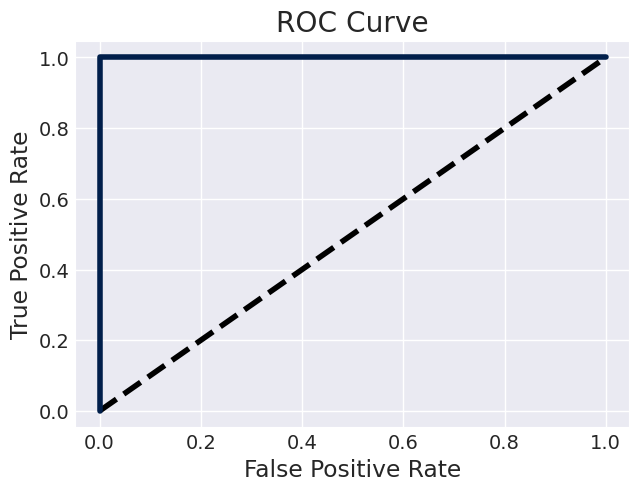

accuracy  0.9751552795031055
precision_positive  0.9864864864864865
precision_negative  0.9655172413793104
recall_sensitivity  0.9605263157894737
recall_specificity  0.9882352941176471
f1_positive score  0.9733333333333333
f1_negative score  0.9767441860465116
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        85
           1       0.99      0.96      0.97        76

    accuracy                           0.98       161
   macro avg       0.98      0.97      0.98       161
weighted avg       0.98      0.98      0.98       161

hamming_loss  0.024844720496894408
log loss  0.08751880560248863
roc_auc_score for  <catboost.core.CatBoostClassifier object at 0x7f85c467c4c0>  :  0.9989164086687305


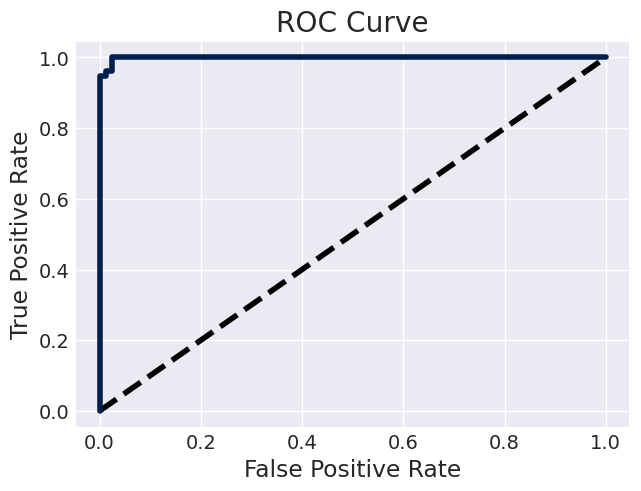

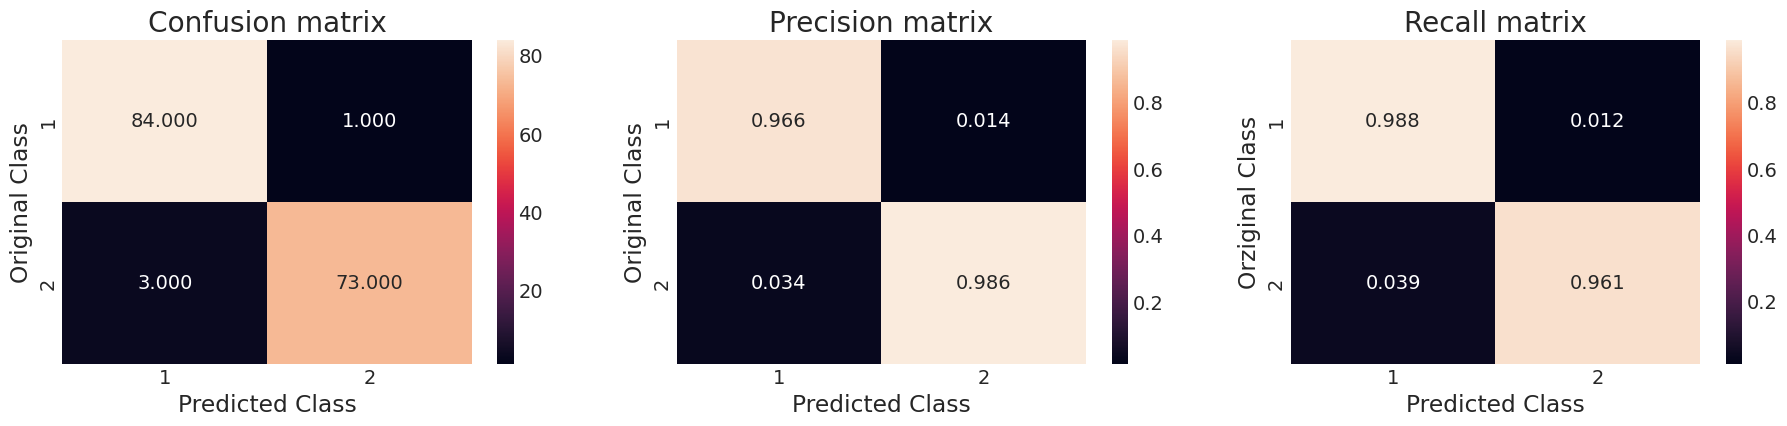

In [ ]:

score_generate(X_test, y_test, predicted_y,model_CBC)
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
model_CBC.score(X_test,y_test)

0.9751552795031055

#xg

First, the number of sub-trees to train, second, the maximum tree depth (a regularization hyperparameter), fourth, the L1 (reg alpha) and L2 (reg lambda) regularization rates that determine the extremity of weights on the leaves, fifth, the complexity control (gamma=), a pseudo-regularization hyperparameter, and sixth, the minimum child weight.

In [ ]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)



In [ ]:
xgb2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
xgb2.score(X_test,y_test)

0.9751552795031055

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       326

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643

hamming_loss  0.0
log loss  0.023667787360010628
roc_auc_score for  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=

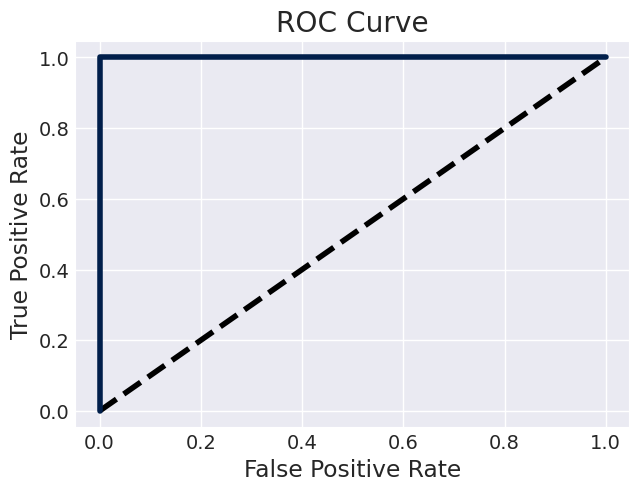

In [ ]:
predicted_y_train = xgb2.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,xgb2)

accuracy  0.9751552795031055
precision_positive  0.9864864864864865
precision_negative  0.9655172413793104
recall_sensitivity  0.9605263157894737
recall_specificity  0.9882352941176471
f1_positive score  0.9733333333333333
f1_negative score  0.9767441860465116
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        85
           1       0.99      0.96      0.97        76

    accuracy                           0.98       161
   macro avg       0.98      0.97      0.98       161
weighted avg       0.98      0.98      0.98       161

hamming_loss  0.024844720496894408
log loss  0.08857331071043018
roc_auc_score for  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance

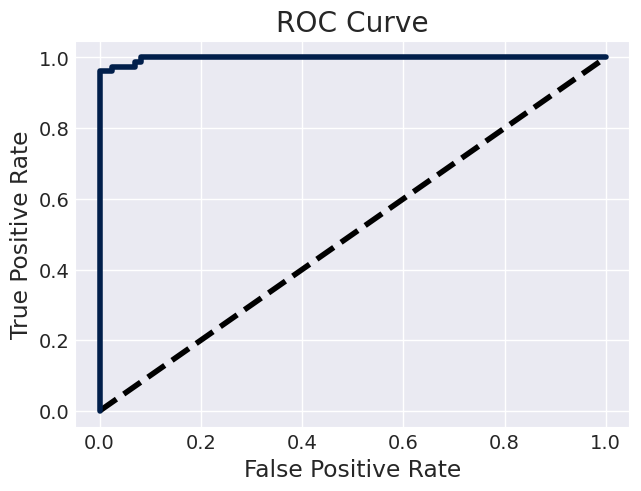

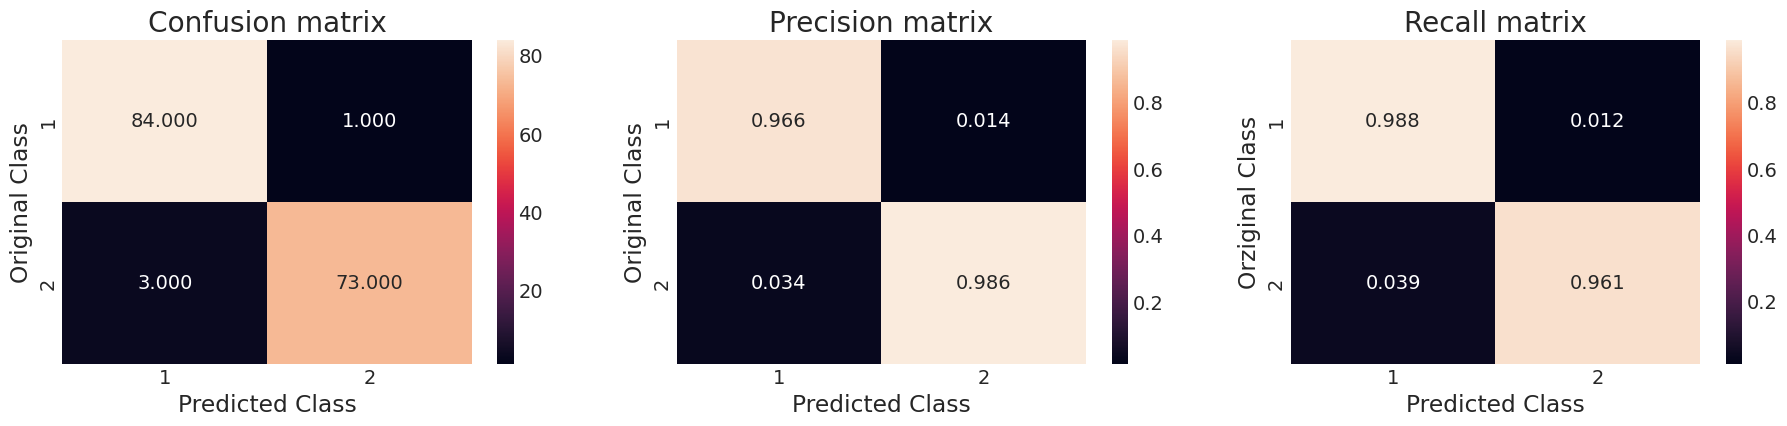

In [ ]:
y_pred = xgb2.predict(X_test)
score_generate(X_test, y_test, y_pred,xgb2)
plot_confusion_matrix(y_test, y_pred)


#adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(n_estimators=100, random_state=1)
model_ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
y_pred = model_ada.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1])

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       326

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643

hamming_loss  0.0
log loss  0.5684965313958416
roc_auc_score for  AdaBoostClassifier(n_estimators=100, random_state=1)  :  1.0


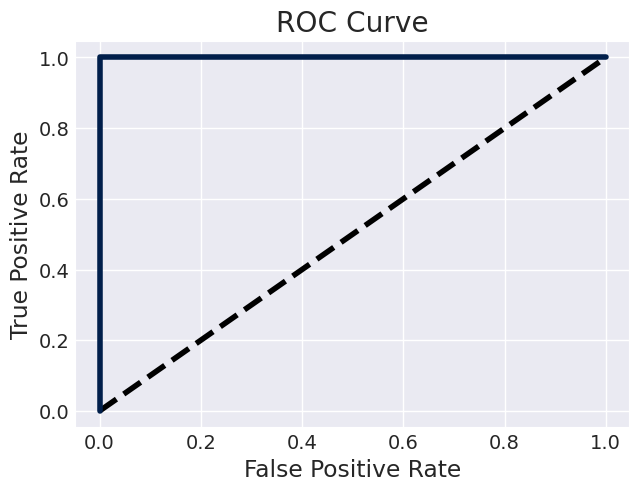

In [ ]:
predicted_y_train = model_ada.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,model_ada)

accuracy  0.9627329192546584
precision_positive  0.9605263157894737
precision_negative  0.9647058823529412
recall_sensitivity  0.9605263157894737
recall_specificity  0.9647058823529412
f1_positive score  0.9605263157894737
f1_negative score  0.9647058823529412
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        85
           1       0.96      0.96      0.96        76

    accuracy                           0.96       161
   macro avg       0.96      0.96      0.96       161
weighted avg       0.96      0.96      0.96       161

hamming_loss  0.037267080745341616
log loss  0.5794722322943049
roc_auc_score for  AdaBoostClassifier(n_estimators=100, random_state=1)  :  0.9939628482972137


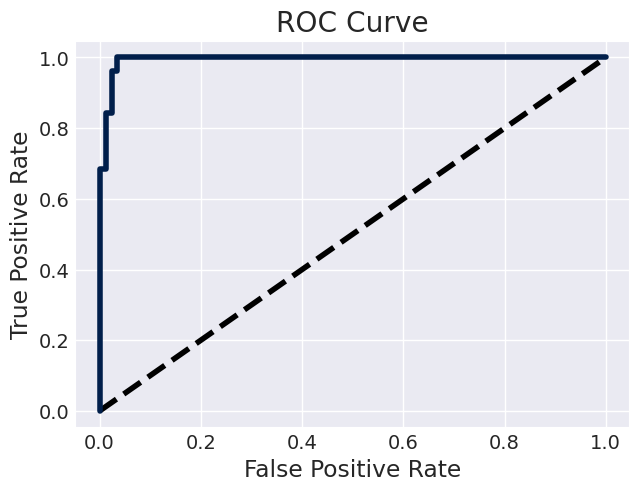

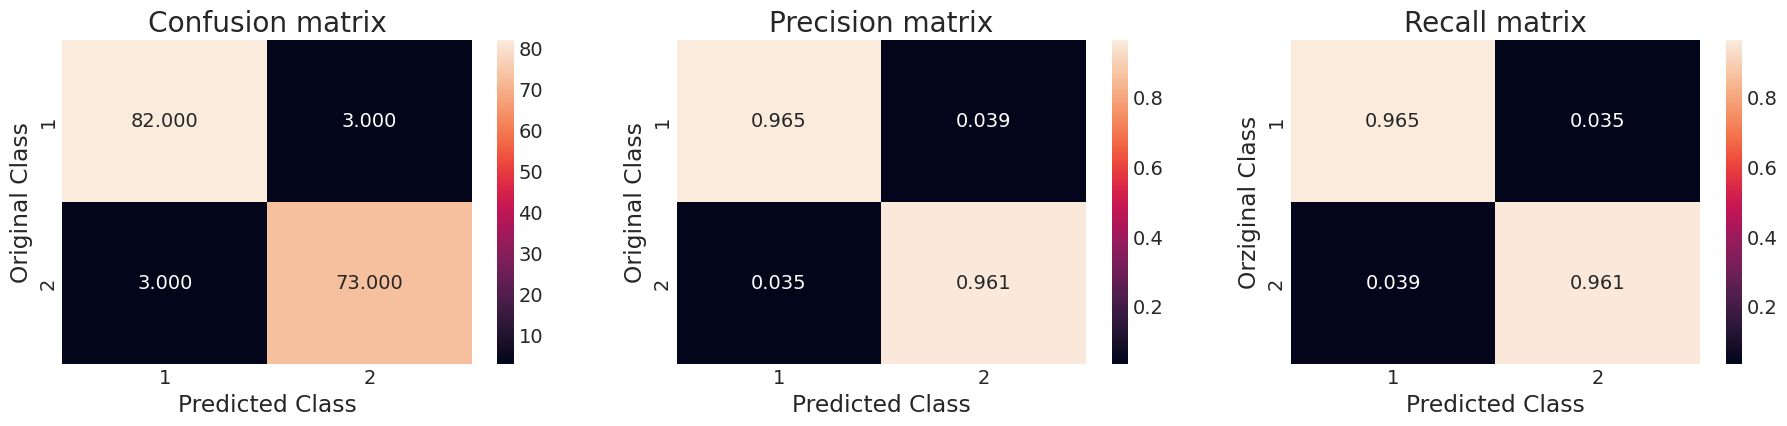

In [ ]:
score_generate(X_test, y_test, y_pred,model_ada)
plot_confusion_matrix(y_test, y_pred)

In [ ]:

print('Accuracy score', accuracy_score(y_test, y_pred))

Accuracy score 0.9627329192546584


#SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [ ]:
svc = SVC(kernel = 'linear', C = 0.001, random_state=0,gamma='auto', probability=True) #'linear', 'poly', 'rbf', 'sigmoid'

svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.9627329192546584

In [ ]:
X_train.shape

(643, 27895)

In [ ]:
X_test.shape

(161, 27895)

In [ ]:
y_train.shape

(643,)

In [ ]:
y_test.shape

(161,)

In [ ]:
x_new.shape

(804, 27895)

In [ ]:
X.shape

(633, 27895)

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       326

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643

hamming_loss  0.0
log loss  0.002799069650869703
roc_auc_score for  SVC(C=0.001, gamma='auto', kernel='linear', probability=True, random_state=0)  :  1.0


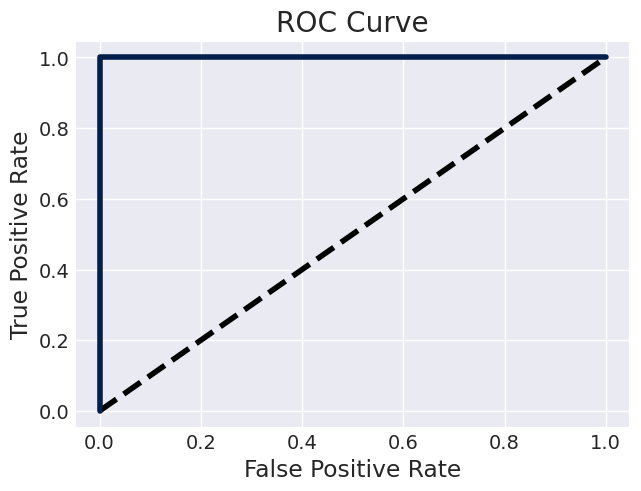

In [ ]:
predicted_y_train = svc.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,svc)

In [ ]:
y_pred = svc.predict(X_test)

accuracy  0.9627329192546584
precision_positive  0.972972972972973
precision_negative  0.9540229885057471
recall_sensitivity  0.9473684210526315
recall_specificity  0.9764705882352941
f1_positive score  0.9599999999999999
f1_negative score  0.9651162790697674
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        85
           1       0.97      0.95      0.96        76

    accuracy                           0.96       161
   macro avg       0.96      0.96      0.96       161
weighted avg       0.96      0.96      0.96       161

hamming_loss  0.037267080745341616
log loss  0.14479412133484207
roc_auc_score for  SVC(C=0.001, gamma='auto', kernel='linear', probability=True, random_state=0)  :  0.9888544891640867


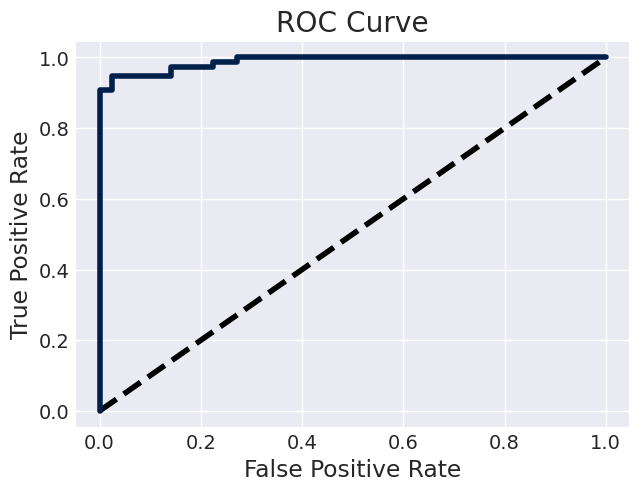

In [ ]:
score_generate(X_test, y_test, y_pred, svc)

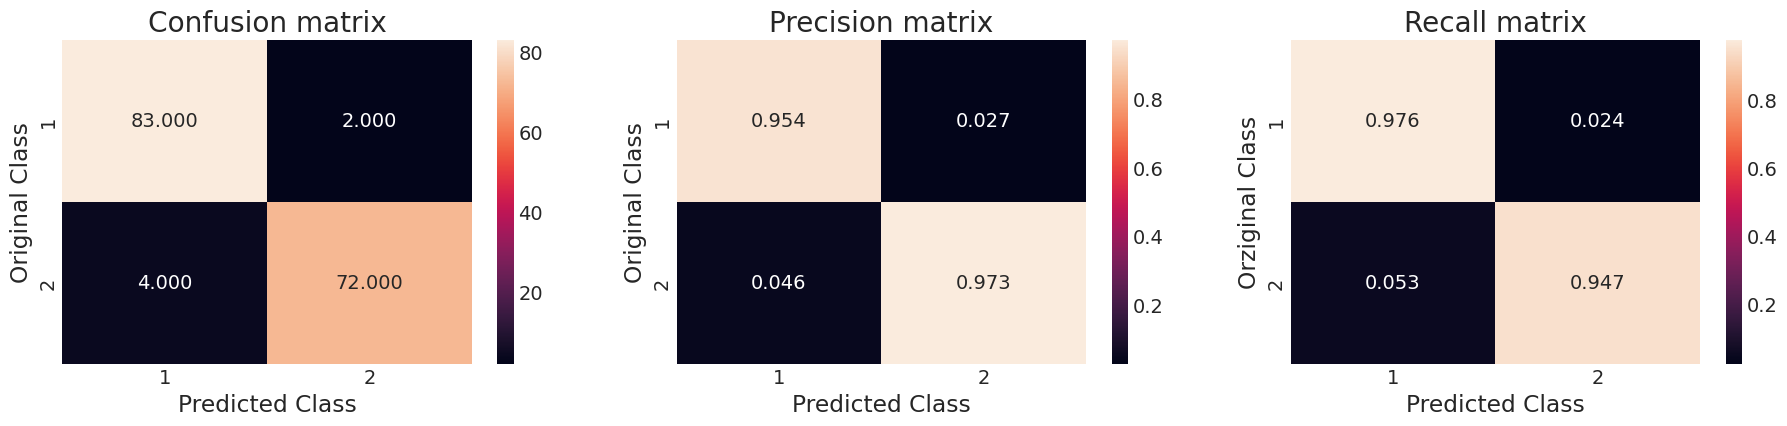

In [ ]:

plot_confusion_matrix(y_test, y_pred)

#logit

In [ ]:
logistic_model = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter = 100, C = 5, random_state = 42)

logistic_model.fit(X_train, y_train)

logistic_model.score(X_test,y_test)

0.9627329192546584

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       326

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643

hamming_loss  0.0
log loss  8.805650318468028e-05
roc_auc_score for  LogisticRegression(C=5, random_state=42, solver='newton-cg')  :  1.0


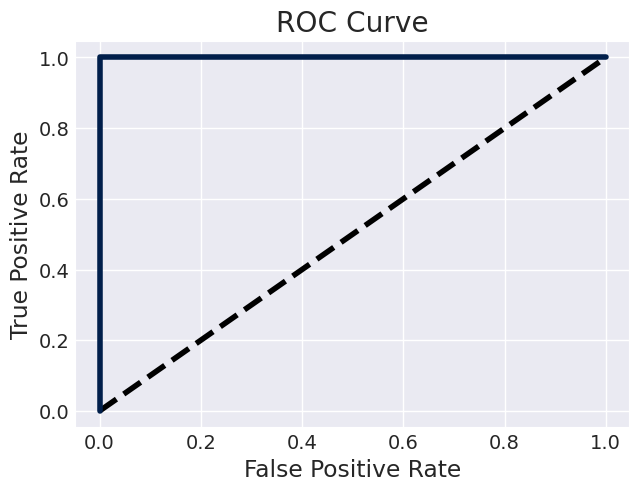

In [ ]:
predicted_y_train = logistic_model.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,logistic_model)

accuracy  0.9627329192546584
precision_positive  0.972972972972973
precision_negative  0.9540229885057471
recall_sensitivity  0.9473684210526315
recall_specificity  0.9764705882352941
f1_positive score  0.9599999999999999
f1_negative score  0.9651162790697674
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        85
           1       0.97      0.95      0.96        76

    accuracy                           0.96       161
   macro avg       0.96      0.96      0.96       161
weighted avg       0.96      0.96      0.96       161

hamming_loss  0.037267080745341616
log loss  0.16685854216182527
roc_auc_score for  LogisticRegression(C=5, random_state=42, solver='newton-cg')  :  0.9896284829721361


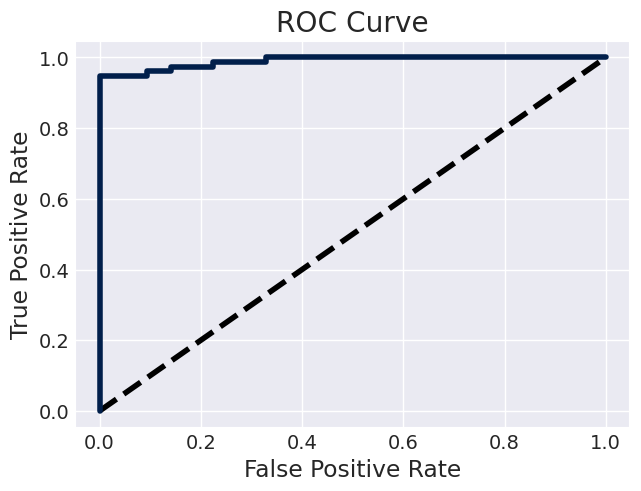

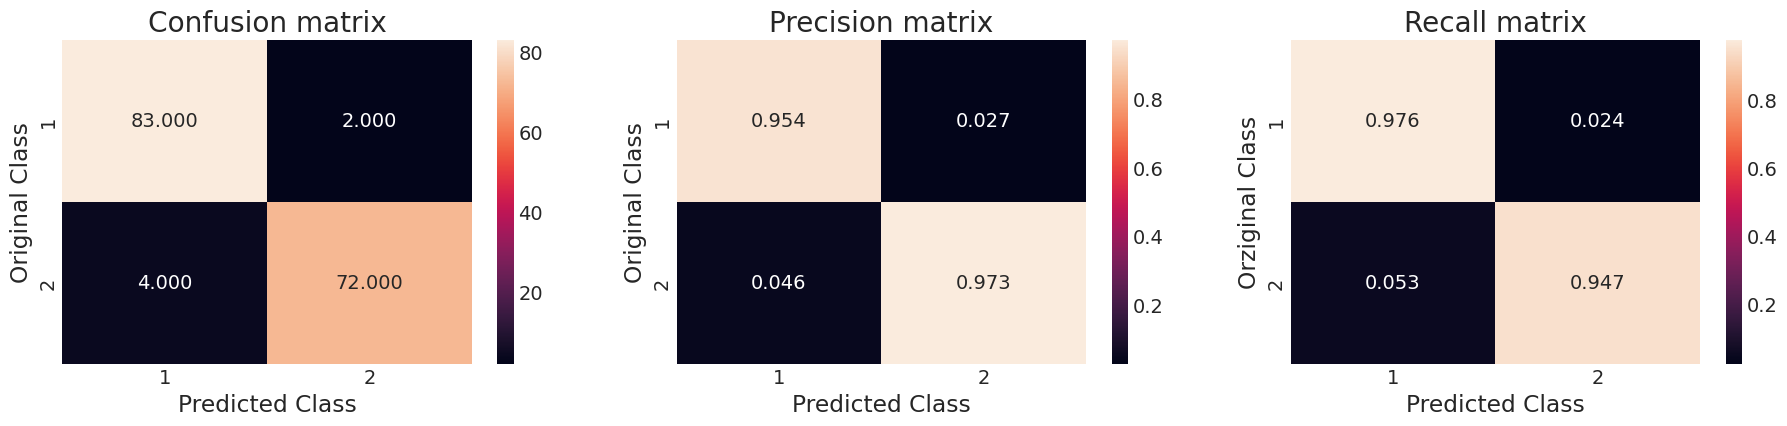

In [ ]:
y_pred = logistic_model.predict(X_test)
score_generate(X_test, y_test, y_pred,logistic_model)
plot_confusion_matrix(y_test, y_pred)

#random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 400,
                                             min_samples_split = 20,
                                             min_samples_leaf = 10,
                                             criterion = 'gini',
                                             n_jobs=1,
                                             bootstrap =  True,
                                             max_depth = 150,
                                             max_features = 'auto',
                                             random_state=0)

random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_test,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9440993788819876

accuracy  0.9751166407465007
precision_positive  0.9783950617283951
precision_negative  0.9717868338557993
recall_sensitivity  0.9723926380368099
recall_specificity  0.9779179810725552
f1_positive score  0.9753846153846154
f1_negative score  0.9748427672955975
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       317
           1       0.98      0.97      0.98       326

    accuracy                           0.98       643
   macro avg       0.98      0.98      0.98       643
weighted avg       0.98      0.98      0.98       643

hamming_loss  0.024883359253499222
log loss  0.23011574118964
roc_auc_score for  RandomForestClassifier(max_depth=150, max_features='auto', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=400, n_jobs=1,
                       random_state=0)  :  0.9986355983046583


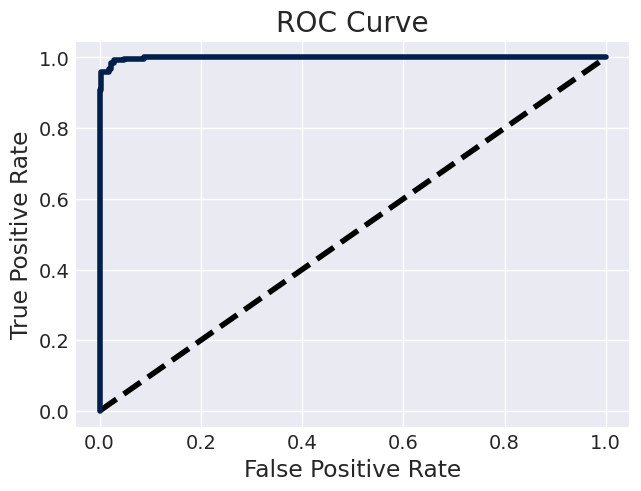

In [ ]:
predicted_y_train = random_forest_model.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,random_forest_model)

accuracy  0.9440993788819876
precision_positive  0.935064935064935
precision_negative  0.9523809523809523
recall_sensitivity  0.9473684210526315
recall_specificity  0.9411764705882353
f1_positive score  0.9411764705882352
f1_negative score  0.9467455621301775
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        85
           1       0.94      0.95      0.94        76

    accuracy                           0.94       161
   macro avg       0.94      0.94      0.94       161
weighted avg       0.94      0.94      0.94       161

hamming_loss  0.055900621118012424
log loss  0.30969090243911335
roc_auc_score for  RandomForestClassifier(max_depth=150, max_features='auto', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=400, n_jobs=1,
                       random_state=0)  :  0.9860681114551083


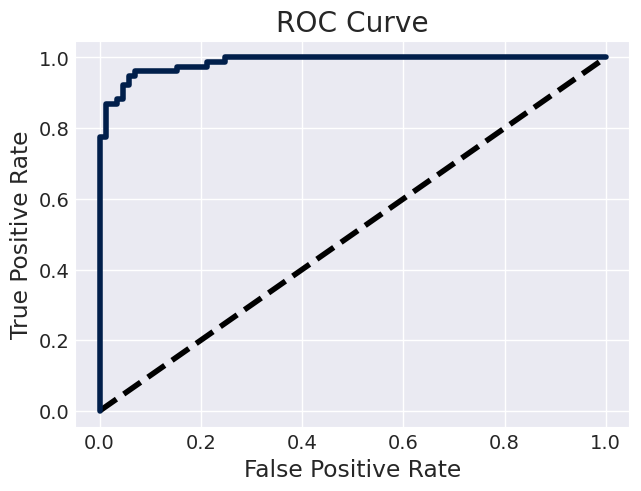

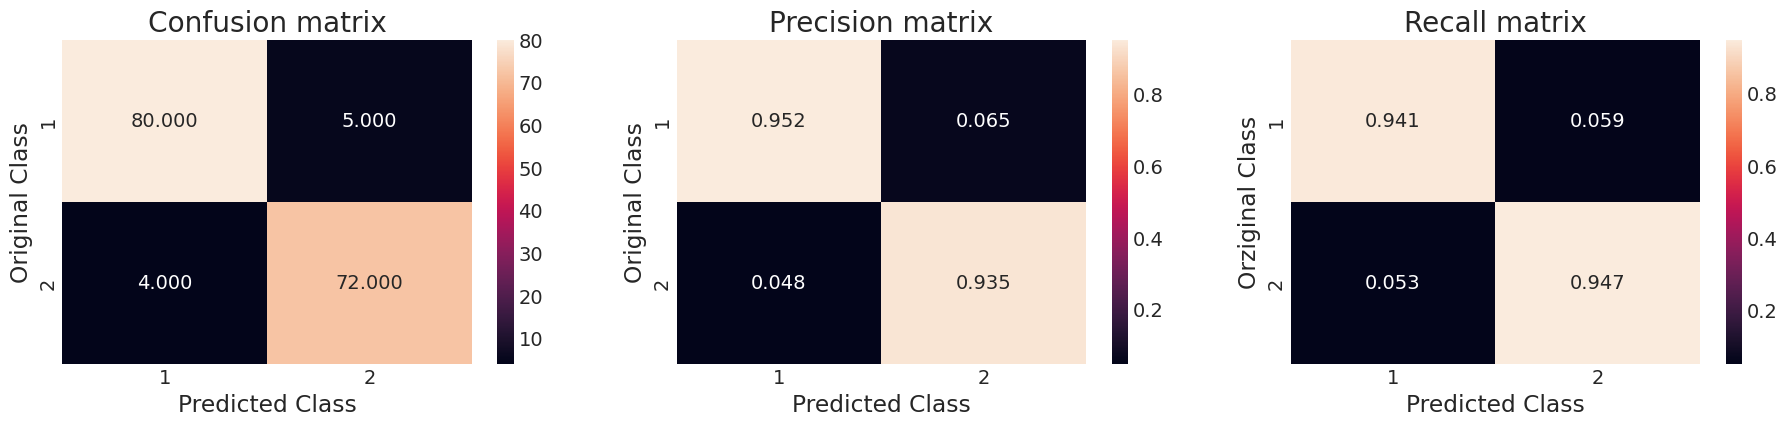

In [ ]:
y_pred = random_forest_model.predict(X_test)
score_generate(X_test,y_test, y_pred,random_forest_model)
plot_confusion_matrix(y_test, y_pred)

#NuSVC

In [ ]:
from sklearn.svm import NuSVC
nusvcc=NuSVC(nu=.2015230,kernel='rbf',gamma='scale',tol =1e-13, probability=True)

In [ ]:
nusvcc.fit(X_train, y_train)
nusvcc.score(X_test,y_test)

In [ ]:
y_prednusvc = nusvcc.predict(X_test)

In [ ]:
predicted_y_train = nusvcc.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,nusvcc)

In [ ]:
score_generate(X_test,y_test, y_prednusvc,nusvcc)
plot_confusion_matrix(y_test, y_prednusvc)

In [ ]:
from sklearn.svm import NuSVC
clf=NuSVC(nu=.2015230,kernel='rbf',gamma='scale',tol =1e-13)

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

#KNeighbors Classifier -

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier()

In [ ]:
param_grid={'n_neighbors':[1,4,5,7,10,12,50,100,500,300,200,30,40,70,1000], 'weights':['uniform', 'distance']}

In [ ]:
rcv_knn=RandomizedSearchCV(knn,param_grid,cv=15)
rcv_knn.fit(X_train, y_train)

In [ ]:
y_pred_knn=rcv_knn.predict(X_test)


In [ ]:
predicted_y_train = rcv_knn.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,rcv_knn)

In [ ]:
score_generate(X_test,y_test, y_pred_knn,rcv_knn)
plot_confusion_matrix(y_test, y_pred_knn)

In [ ]:
print(f'\nBest Parameter: {rcv_knn.best_params_}\n')

crosscheck

In [ ]:
model_knn = KNeighborsClassifier(weights = 'distance', n_neighbors = 100)

model_knn.fit(X_train, y_train)

In [ ]:
model_knn.score(X_test,y_test)

#**SGD (Stochastic gradient descent ) - 93%**

In [ ]:
from sklearn.linear_model import SGDClassifier


In [ ]:
param_grid = {
'penalty': ['l2', 'l1', 'elasticnet'],
'loss' : ["hinge", "log",'modified_huber','squared_hinge','perceptron','squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'] ,
}

In [ ]:
sgd=RandomizedSearchCV(SGDClassifier(random_state=42),param_grid,cv=5)
sgd.fit(X_train, y_train)

In [ ]:
predicted_y_train = sgd.predict(X_train)
score_generate_train(X_train, y_train, predicted_y_train,sgd)

In [ ]:
y_pred = sgd.predict(X_test)
score_generate(X_test,y_test, y_pred,sgd)
plot_confusion_matrix(y_test, y_pred)

In [ ]:

print(f'\nBest Parameter: {sgd.best_params_}\n')

crosscheck

In [ ]:
sgd_model = SGDClassifier(penalty = 'l2', loss = 'hinge', alpha= 123, random_state=0)

sgd_model.fit(X_train, y_train)
sgd_model.score(X_test,y_test)

In [ ]:

sgd_model.score(xtrain,ytrain)

#false positive 0


In [ ]:


from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression(penalty = 'l2', max_iter = 10, C = 2.8, random_state = 0)

logistic_model.fit(xtrain, ytrain)

logistic_model.score(xtest,ytest)

In [ ]:
y__log=logistic_model.predict(xtest)

In [ ]:
confusion_svc=confusion_matrix(ytest,y__log)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

#NuSVC

In [ ]:
from sklearn.svm import NuSVC
clf=NuSVC(nu=.2015230,kernel='rbf',gamma='scale',tol =1e-13)

In [ ]:
clf.fit(xtrain, ytrain)
clf.score(xtest,ytest)

0.9130434782608695

In [ ]:
clf_y=clf.predict(xtest)
from sklearn.metrics import confusion_matrix

Text(24.58, 0.5, 'Actual')

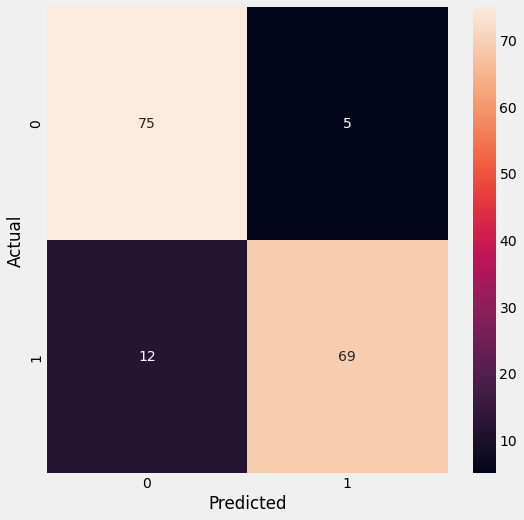

In [ ]:
confusion_svc=confusion_matrix(ytest,clf_y)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

#SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(C=1, kernel='linear', degree=0, gamma='scale')
model.fit(xtrain, ytrain)
model.score(xtest,ytest)

model.score(xtest,ytest)

0.9192546583850931

In [ ]:
y__svc=model.predict(xtest)

Text(24.58, 0.5, 'Actual')

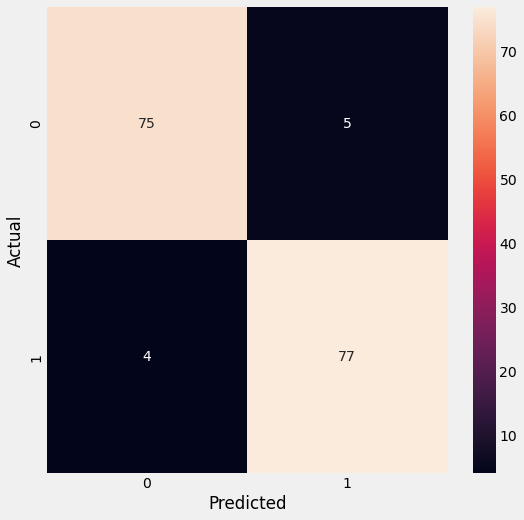

In [ ]:
confusion_svc=confusion_matrix(ytest,y__svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

#LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
# , C=0.001, loss = 'squared_hinge',penalty='l1', dual=False, tol= 0.099110110000003

In [ ]:
cl1j = LinearSVC(C=100)#, tol=0.1110110000003 , loss='squared_hinge'
#random_state=0, penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001,
#C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, max_iter=1000

In [ ]:
cl1j.fit(xtrain, ytrain)
cl1j.score(xtest,ytest)
#dual=False

0.906832298136646

In [ ]:
y__svc=cl1j.predict(xtest)

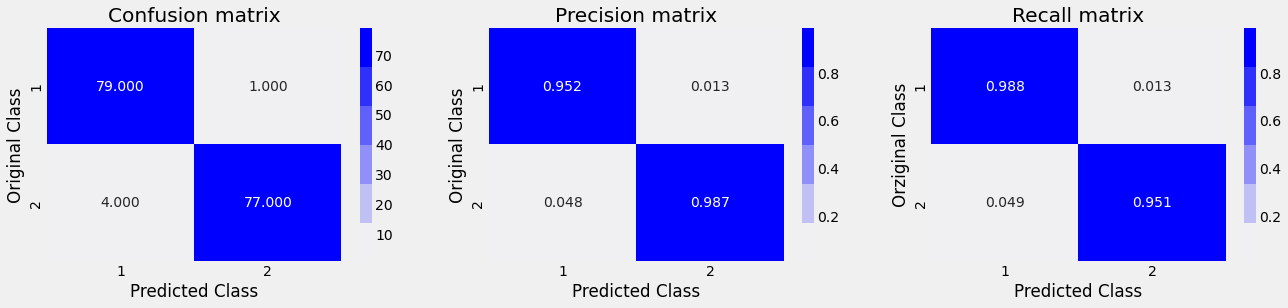

In [ ]:
plot_confusion_matrix(ytest, y__svc)

Text(24.58, 0.5, 'Actual')

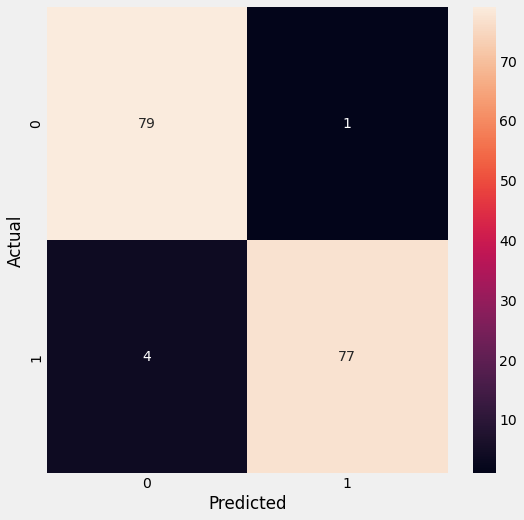

In [ ]:
confusion_svc=confusion_matrix(ytest,y__svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")